#### Initial Inspection of Data

In [7]:
# Check data distribution of train, test and validation data
import os

# Paths to the train, test, and validation directories
train_dir = '../data/train'
test_dir = '../data/test'
valid_dir = '../data/valid'

# Function to count the number of images in each class for a given directory
def count_images(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        if class_name == '.DS_Store':
            continue
        class_path = os.path.join(directory, class_name)
        class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Count images in train, test, and validation folders
train_counts = count_images(train_dir)
test_counts = count_images(test_dir)
valid_counts = count_images(valid_dir)

print("Training data distribution:", train_counts)
print("\nTesting data distribution:", test_counts)
print("\nValidation data distribution:", valid_counts)

Training data distribution: {'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 195, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 115, 'normal': 148, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 155}

Testing data distribution: {'adenocarcinoma': 120, 'large.cell.carcinoma': 51, 'normal': 54, 'squamous.cell.carcinoma': 90}

Validation data distribution: {'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 23, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 21, 'normal': 13, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 15}


In [9]:
from PIL import Image

# Check image sizes and formats for a sample set of images
def check_image_properties(directory):
    image_sizes = []
    image_formats = []
    for class_name in os.listdir(directory):
        if class_name == '.DS_Store':
            continue
        
        class_path = os.path.join(directory, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            with Image.open(image_path) as img:
                image_sizes.append(img.size)
                image_formats.append(img.format)
    return image_sizes, image_formats

train_image_sizes, train_image_formats = check_image_properties(train_dir)
print("Image sizes in the training set:", set(train_image_sizes))
print("Image formats in the training set:", set(train_image_formats))

# get max image width and height
max_width = 0
max_height = 0
for size in train_image_sizes:
    max_width = max(max_width, size[0])
    max_height = max(max_height, size[1])

print("Maximum image width:", max_width)
print("Maximum image height:", max_height)

Image sizes in the training set: {(434, 261), (309, 248), (396, 216), (413, 305), (425, 279), (388, 248), (437, 262), (377, 220), (847, 533), (418, 267), (366, 229), (437, 280), (432, 174), (400, 240), (414, 251), (385, 196), (377, 350), (401, 317), (364, 249), (345, 245), (668, 517), (345, 272), (436, 292), (428, 288), (425, 301), (429, 271), (357, 264), (450, 303), (216, 136), (438, 338), (414, 228), (421, 276), (422, 259), (372, 249), (425, 404), (362, 226), (384, 232), (376, 228), (372, 276), (376, 237), (413, 286), (395, 259), (370, 324), (417, 256), (435, 313), (223, 143), (374, 303), (416, 318), (417, 283), (386, 277), (429, 266), (850, 506), (399, 243), (390, 274), (225, 225), (401, 280), (341, 247), (412, 298), (352, 256), (444, 241), (420, 320), (282, 179), (384, 245), (432, 294), (345, 244), (615, 495), (446, 296), (425, 273), (397, 309), (449, 310), (410, 220), (327, 231), (619, 479), (337, 272), (401, 275), (402, 252), (377, 317), (420, 297), (349, 255), (413, 258), (361, 

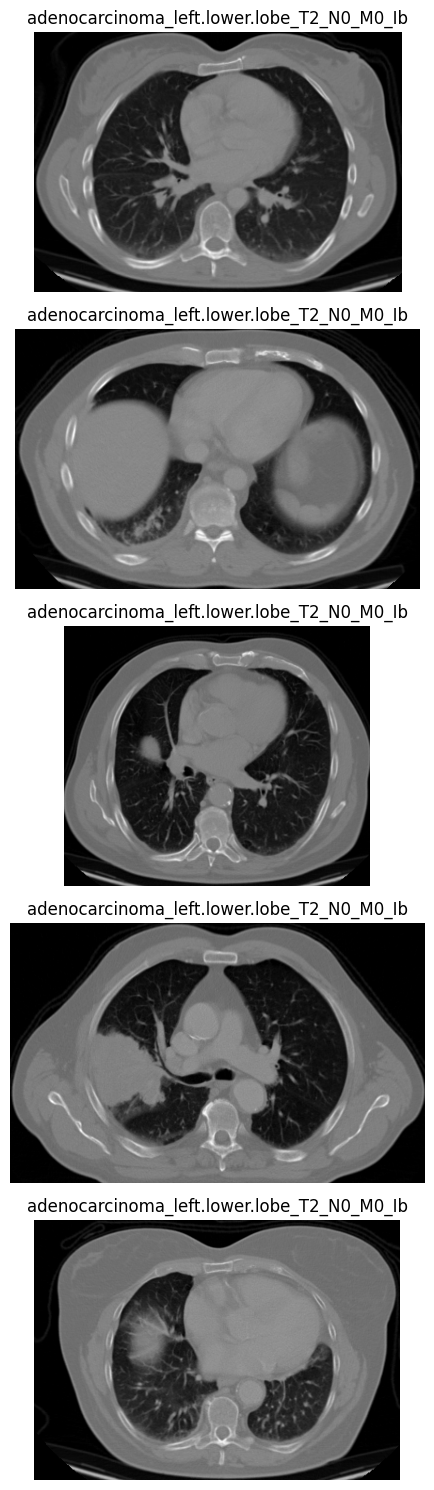

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

def plot_sample_images(directory, num_images=5):
    fig, axes = plt.subplots(num_images, 1, figsize=(5, 15))  # Change to vertical layout (num_images rows, 1 column)
    for class_name in os.listdir(directory):
        if class_name == '.DS_Store':
            continue
        class_path = os.path.join(directory, class_name)
        images = os.listdir(class_path)
        for i in range(num_images):
            image_path = os.path.join(class_path, random.choice(images))
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].set_title(f"{class_name}")
            axes[i].axis('off')
        plt.tight_layout()  # Adjust layout to prevent overlapping
        plt.show()

# Visualize samples from the training set
plot_sample_images(train_dir)

## Preprocessing Techniques  
Not all of them are applicable to our project.

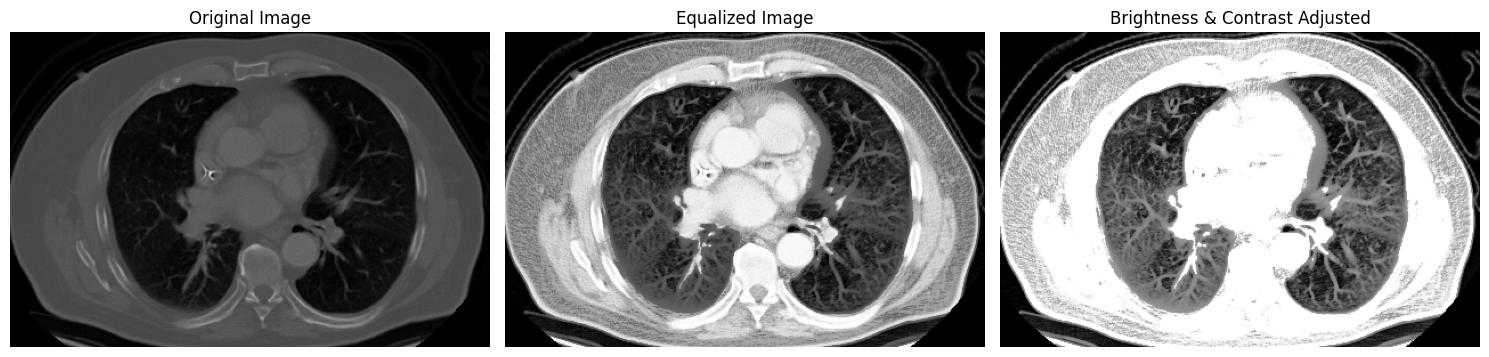

In [13]:
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt

# Randomly select an image from the training set
class_name = random.choice(os.listdir(train_dir))
class_path = os.path.join(train_dir, class_name)
image_name = random.choice(os.listdir(class_path))
image_path = os.path.join(class_path, image_name)

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Apply brightness and contrast adjustment (scaling)
alpha = 1.2  # Simple contrast control (1.0-3.0 range is typical)
beta = 50    # Simple brightness control (-100 to 100 range is typical)
adjusted_image = cv2.convertScaleAbs(equalized_image, alpha=alpha, beta=beta)

# Plot the original, equalized, and adjusted images using Matplotlib
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display original image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display equalized image
axes[1].imshow(equalized_image, cmap='gray')
axes[1].set_title('Equalized Image')
axes[1].axis('off')

# Display brightness and contrast adjusted image
axes[2].imshow(adjusted_image, cmap='gray')
axes[2].set_title('Brightness & Contrast Adjusted')
axes[2].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

# Comment: equalized image looks better

(-0.5, 1199.5, 899.5, -0.5)

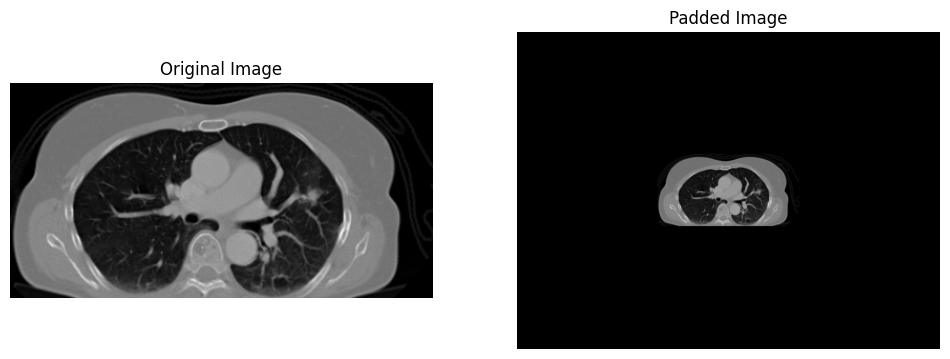

In [26]:
# Randomly select an image from the training set
class_name = random.choice(os.listdir(train_dir))
class_path = os.path.join(train_dir, class_name)
image_name = random.choice(os.listdir(class_path))
image_path = os.path.join(class_path, image_name)

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def pad_image(image, desired_size):
    old_size = image.shape[:2]  # (height, width)
    delta_w = desired_size[1] - old_size[1]
    delta_h = desired_size[0] - old_size[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    
    # Add padding (black border)
    padded_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    return padded_image

padded_image = pad_image(image, (900, 1200))

# plot the original and padded images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Display original image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(padded_image, cmap='gray')
axes[1].set_title('Padded Image')
axes[1].axis('off')

Original image shape: (261, 375)


(-0.5, 1199.5, 899.5, -0.5)

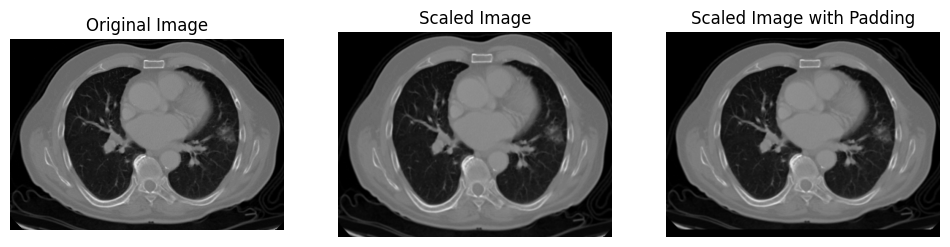

In [27]:
# Randomly select an image from the training set
class_name = random.choice(os.listdir(train_dir))
class_path = os.path.join(train_dir, class_name)
image_name = random.choice(os.listdir(class_path))
image_path = os.path.join(class_path, image_name)

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
print("Original image shape:", image.shape)

# scale the image
def scale_image(image, target_size):
    # Resize the image to the target size without preserving the aspect ratio
    scaled_image = cv2.resize(image, target_size)
    return scaled_image

def scale_image_with_aspect_ratio(image, target_size):
    # Get the original size of the image
    old_size = image.shape[:2]  # height, width
    
    # Compute the scaling factor, keeping the aspect ratio intact
    ratio = min(target_size[0] / old_size[0], target_size[1] / old_size[1])
    new_size = (int(old_size[1] * ratio), int(old_size[0] * ratio))  # (width, height)
    
    # Resize the image to the new size
    scaled_image = cv2.resize(image, new_size)
    
    # Create a new image with the target size, and center the scaled image on it (optional padding)
    delta_w = target_size[1] - new_size[0]
    delta_h = target_size[0] - new_size[1]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    
    # Pad the scaled image to match the target size
    padded_image = cv2.copyMakeBorder(scaled_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    return padded_image

scaled_image = scale_image(image, (1200, 900))
scaled_image_with_padding = scale_image_with_aspect_ratio(image, (900, 1200))

# plot the original and padded images
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
# Display original image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(scaled_image, cmap='gray')
axes[1].set_title('Scaled Image')
axes[1].axis('off')

axes[2].imshow(scaled_image_with_padding, cmap='gray')
axes[2].set_title('Scaled Image with Padding')
axes[2].axis('off')

(-0.5, 442.5, 343.5, -0.5)

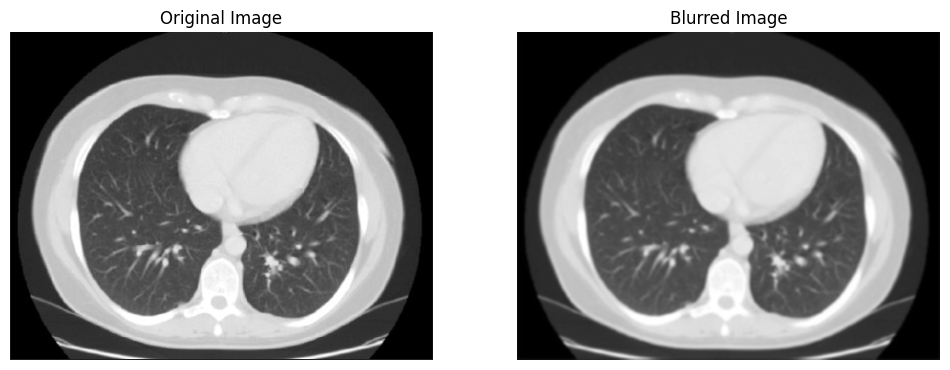

In [28]:
# Apply guassian blur to the image
class_name = random.choice(os.listdir(train_dir))
class_path = os.path.join(train_dir, class_name)
image_name = random.choice(os.listdir(class_path))
image_path = os.path.join(class_path, image_name)

# Load the image in grayscale
image = cv2.imread(image_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# plot the original and blurred images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Display original image
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(blurred_image, cmap='gray')
axes[1].set_title('Blurred Image')
axes[1].axis('off')

# Comment: blurring seems to reduce the details

Text(0.5, 1.0, 'Rotated Image')

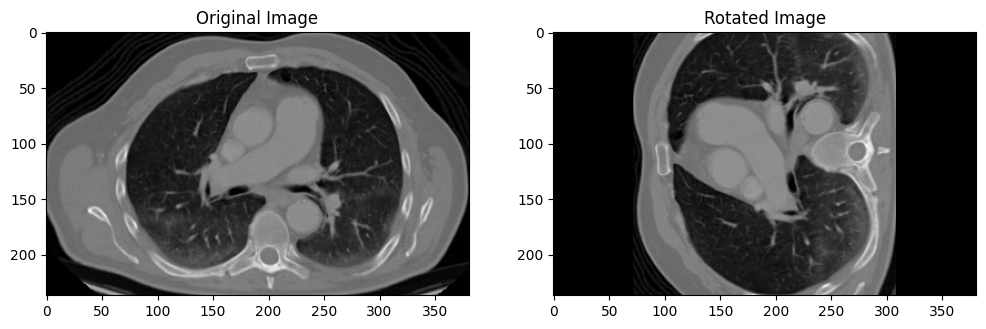

In [29]:
# Randomly select an image from the training set
class_name = random.choice(os.listdir(train_dir))
class_path = os.path.join(train_dir, class_name)
image_name = random.choice(os.listdir(class_path))
image_path = os.path.join(class_path, image_name)

def rotate_image(image, angle):
    # Get the image size (height, width)
    (h, w) = image.shape[:2]
    
    # Calculate the center of the image
    center = (w // 2, h // 2)
    
    # Create the rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    
    # Perform the actual rotation and return the image
    rotated_image = cv2.warpAffine(image, M, (w, h))
    return rotated_image

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
rotated_image = rotate_image(image, 90)

# plot the original and rotated images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display original image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')

# Display rotated image
axes[1].imshow(rotated_image, cmap='gray')
axes[1].set_title('Rotated Image')

# Problem: rotation results in not consistent image size

Text(0.5, 1.0, 'Normalized Image')

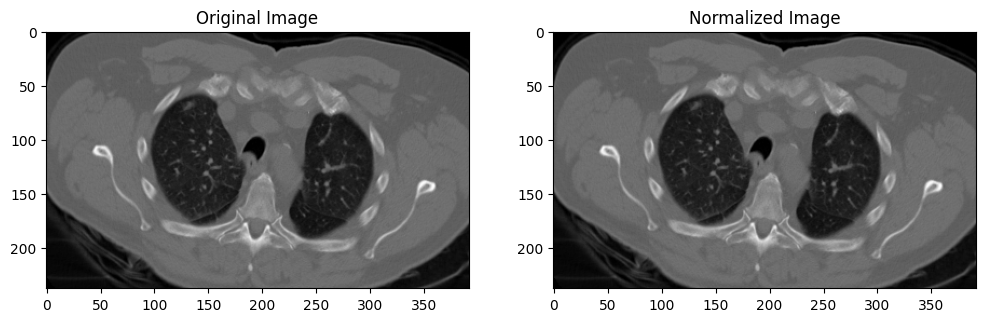

In [30]:
# Adjust the pixel values to the range [0, 1]
def normalize_image(image):
    # Convert the pixel values to the range [0, 1]
    normalized_image = image.astype("float32") / 255
    return normalized_image

# Randomly select an image from the training set
class_name = random.choice(os.listdir(train_dir))
class_path = os.path.join(train_dir, class_name)    
image_name = random.choice(os.listdir(class_path))
image_path = os.path.join(class_path, image_name)

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Normalize the image
normalized_image = normalize_image(image)

# plot the original and normalized images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display original image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')

# Display normalized image
axes[1].imshow(normalized_image, cmap='gray')
axes[1].set_title('Normalized Image')
